In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
train=pd.read_csv("./titanic/train.csv")
test=pd.read_csv("./titanic/test.csv")

/Users/hiroya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

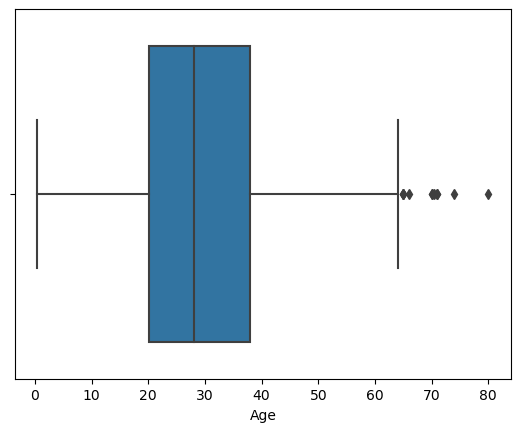

In [4]:
sns.boxplot(train["Age"])

/Users/hiroya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

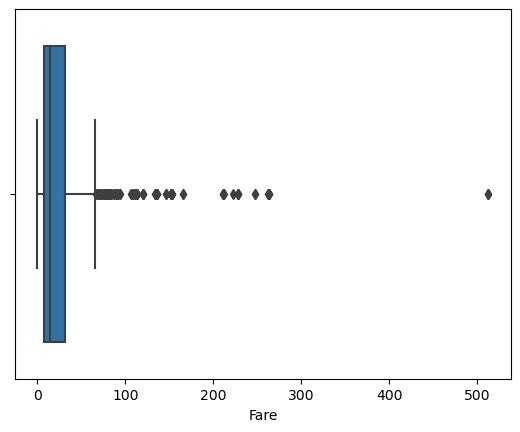

In [5]:
sns.boxplot(train["Fare"])

/Users/hiroya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

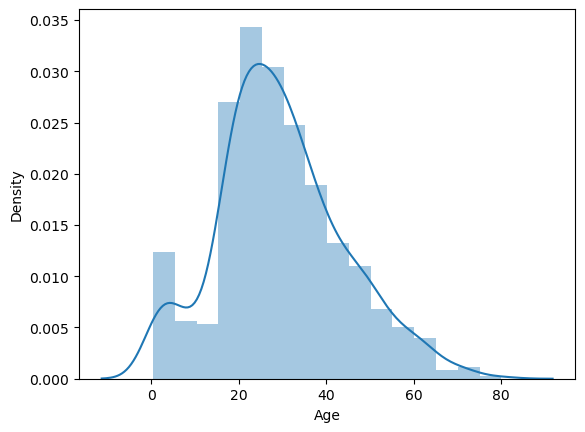

In [6]:
sns.distplot(train["Age"], bins = 16)

In [9]:
train["Age"].value_counts().tail(15)

0.42     1
0.67     1
66.00    1
24.50    1
80.00    1
20.50    1
53.00    1
14.50    1
70.50    1
12.00    1
36.50    1
55.50    1
0.92     1
23.50    1
74.00    1
Name: Age, dtype: int64

/Users/hiroya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


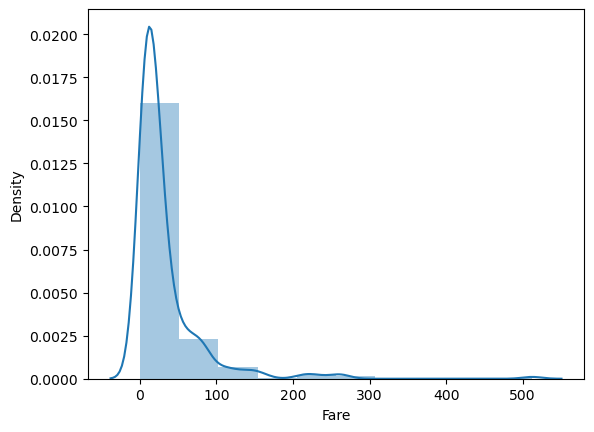

In [18]:
# 「運賃」列を深掘り
# 問題1
sns.distplot(train["Fare"], bins=10)
plt.show()

In [22]:
train["Fare"].value_counts(15)

8.0500     0.048260
13.0000    0.047138
7.8958     0.042649
7.7500     0.038159
26.0000    0.034792
             ...   
35.0000    0.001122
28.5000    0.001122
6.2375     0.001122
14.0000    0.001122
10.5167    0.001122
Name: Fare, Length: 248, dtype: float64

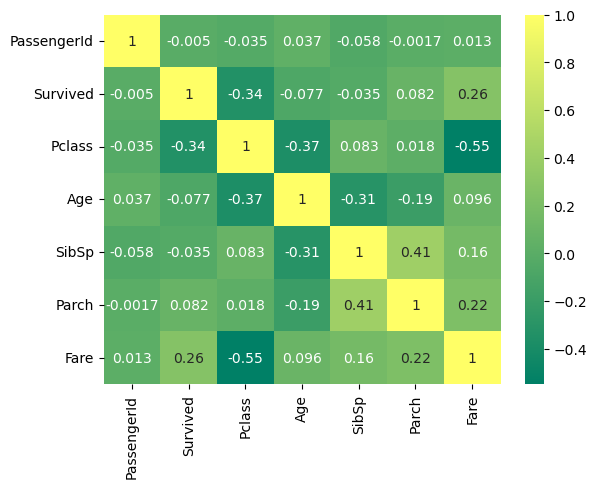

In [25]:
sns.heatmap(train.corr(), cmap = "summer", annot = True)
plt.show()

/Users/hiroya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


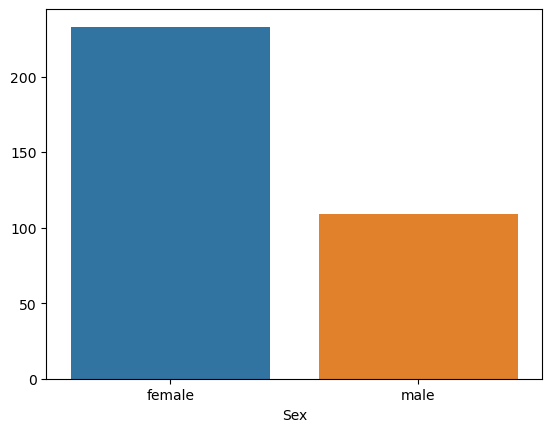

In [37]:
sum_survived = train.groupby(["Sex"])["Survived"].sum()
sns.barplot(sum_survived.keys(), sum_survived.values)
plt.show()

In [43]:
data_count = train.groupby(["Sex","Survived"])["Survived"].count()
sns.barplot(data_count.keys(), data_count.values)
plt.show()

/Users/hiroya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NotImplementedError: isna is not defined for MultiIndex

In [41]:
train.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [44]:
train.groupby(["Sex"])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [63]:
# 「乗船した港」と「生存」列の関係
# 問題1
embarked_data = train.groupby(["Embarked", "Survived"])["Survived"].count()
embarked_data

In [65]:
# 問題2
sns.barplot(embarked_data.keys(), embarked_data.values)
plt.show()

NotImplementedError: isna is not defined for MultiIndex

In [69]:
# 問題3
train.groupby(["Embarked"])["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [73]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""
for df in [train, test]:
    df["Title"] = df["Name"].apply(get_title)
for df in [train, test]:
    
    # "Mlle","Ms","Mme" は Miss に置き換え
    df['Title'] =df['Title'].replace(["Mlle","Ms","Mme"],"Miss") 
    
    # それ以外はOthersへ
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')

In [74]:
train.Title.value_counts()

Mr        517
Miss      186
Mrs       125
Master     40
Others     23
Name: Title, dtype: int64

In [75]:
test.Title.value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: Title, dtype: int64